In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib notebook

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
sns.set_style('whitegrid')

In [17]:
#data = pd.read_csv("./0_Data/Iris.csv")
dir = "/Users/1002516/Downloads/1일차_실습자료"
data = pd.read_csv(dir+"/0_Data/Iris.csv")

In [29]:
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))
#data

- Data has 150 rows and 5 columns.
- Column names:  ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


<IPython.core.display.Javascript object>


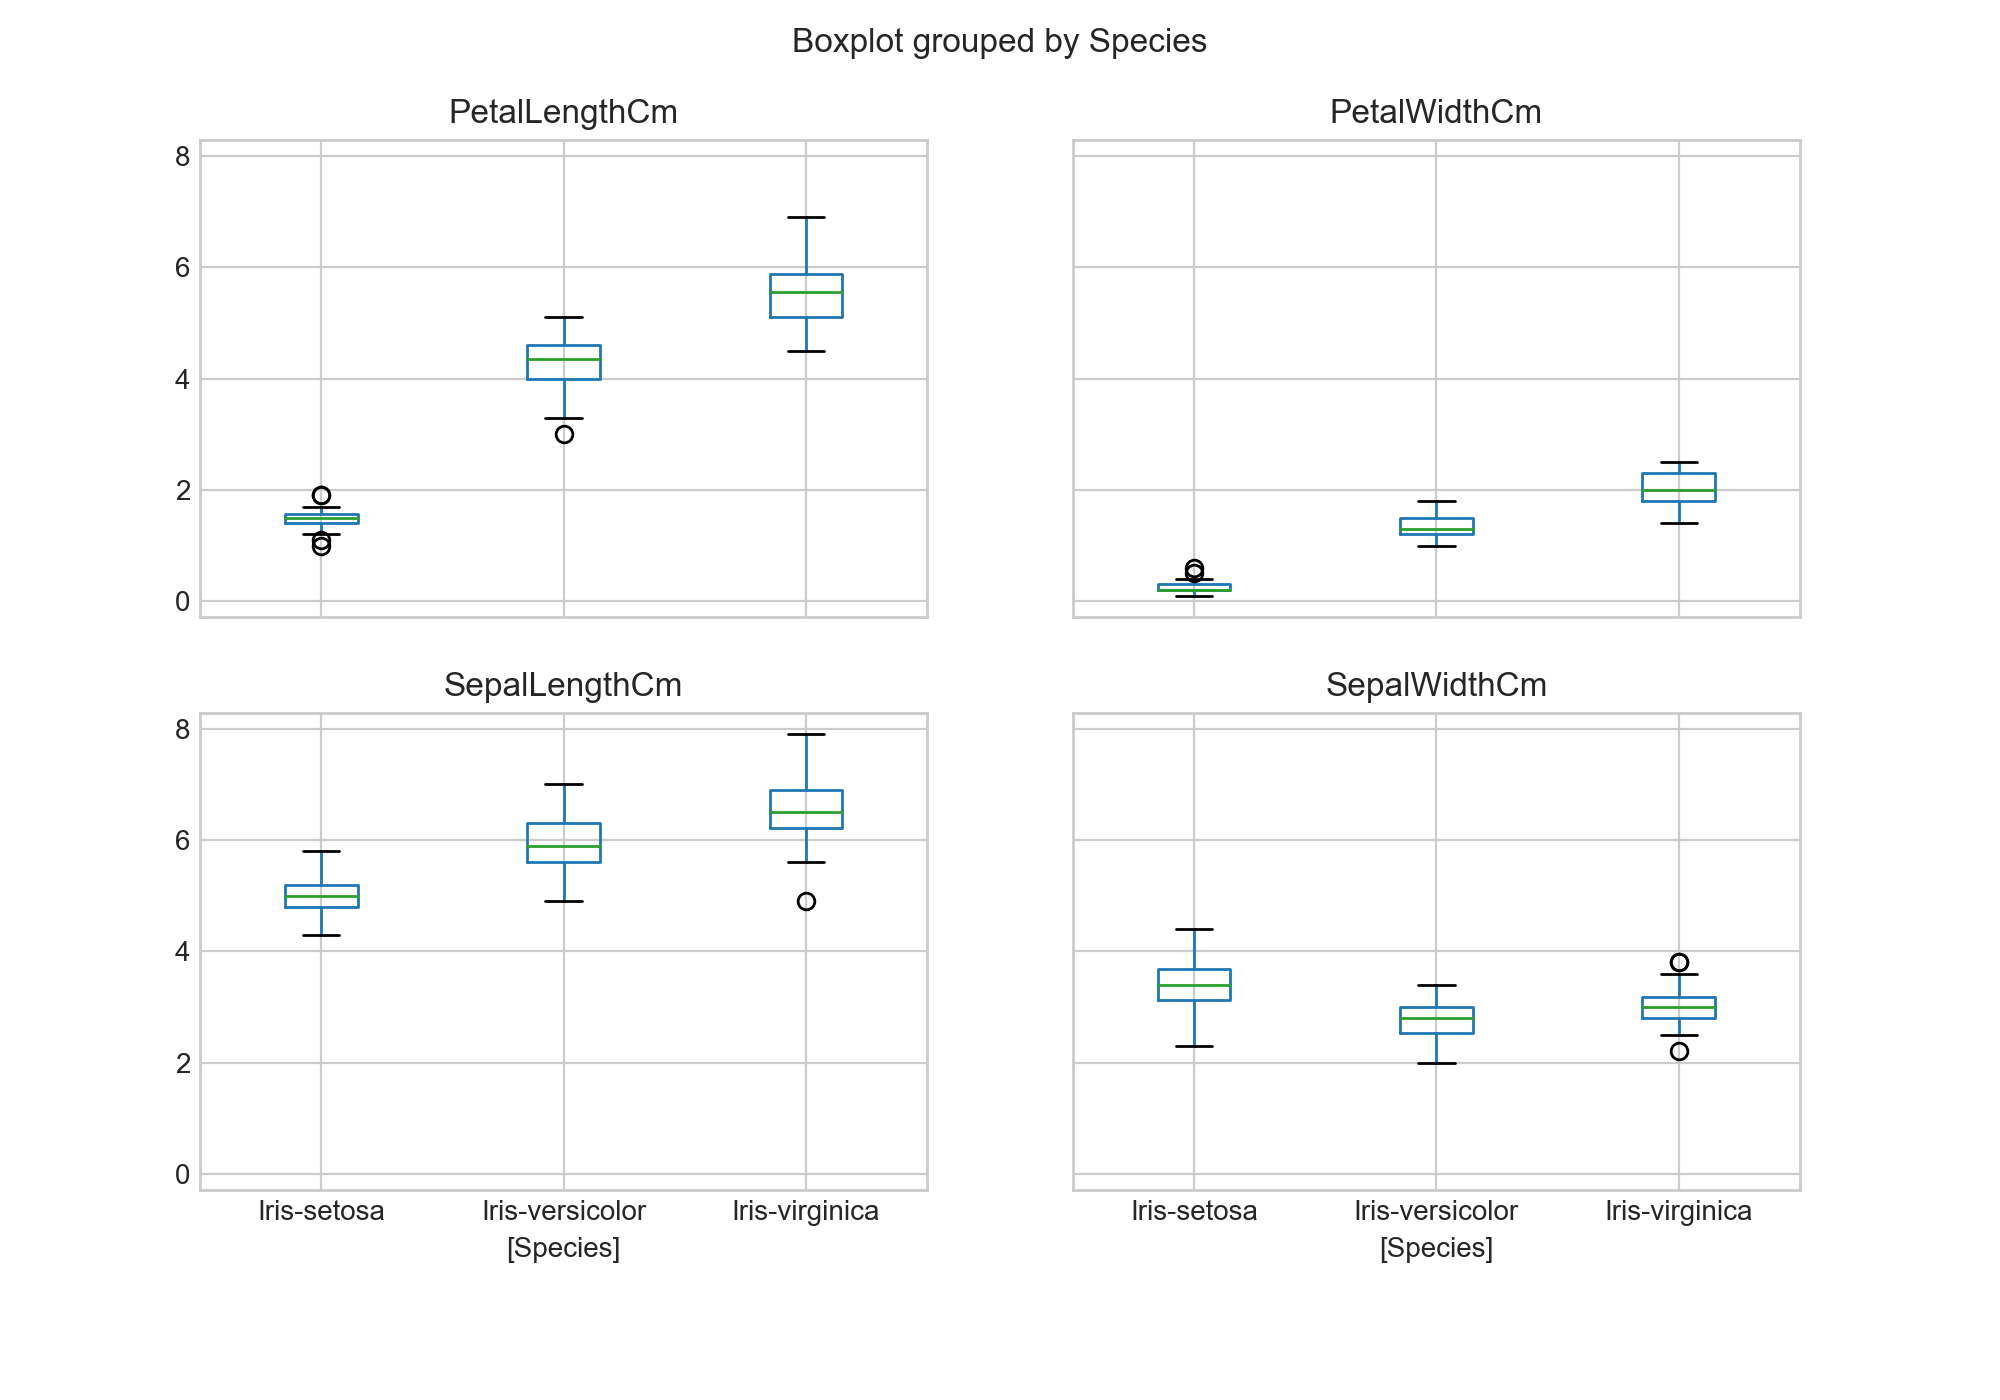

In [34]:
data.boxplot(by='Species', figsize=(10, 7))
plt.show()

<IPython.core.display.Javascript object>


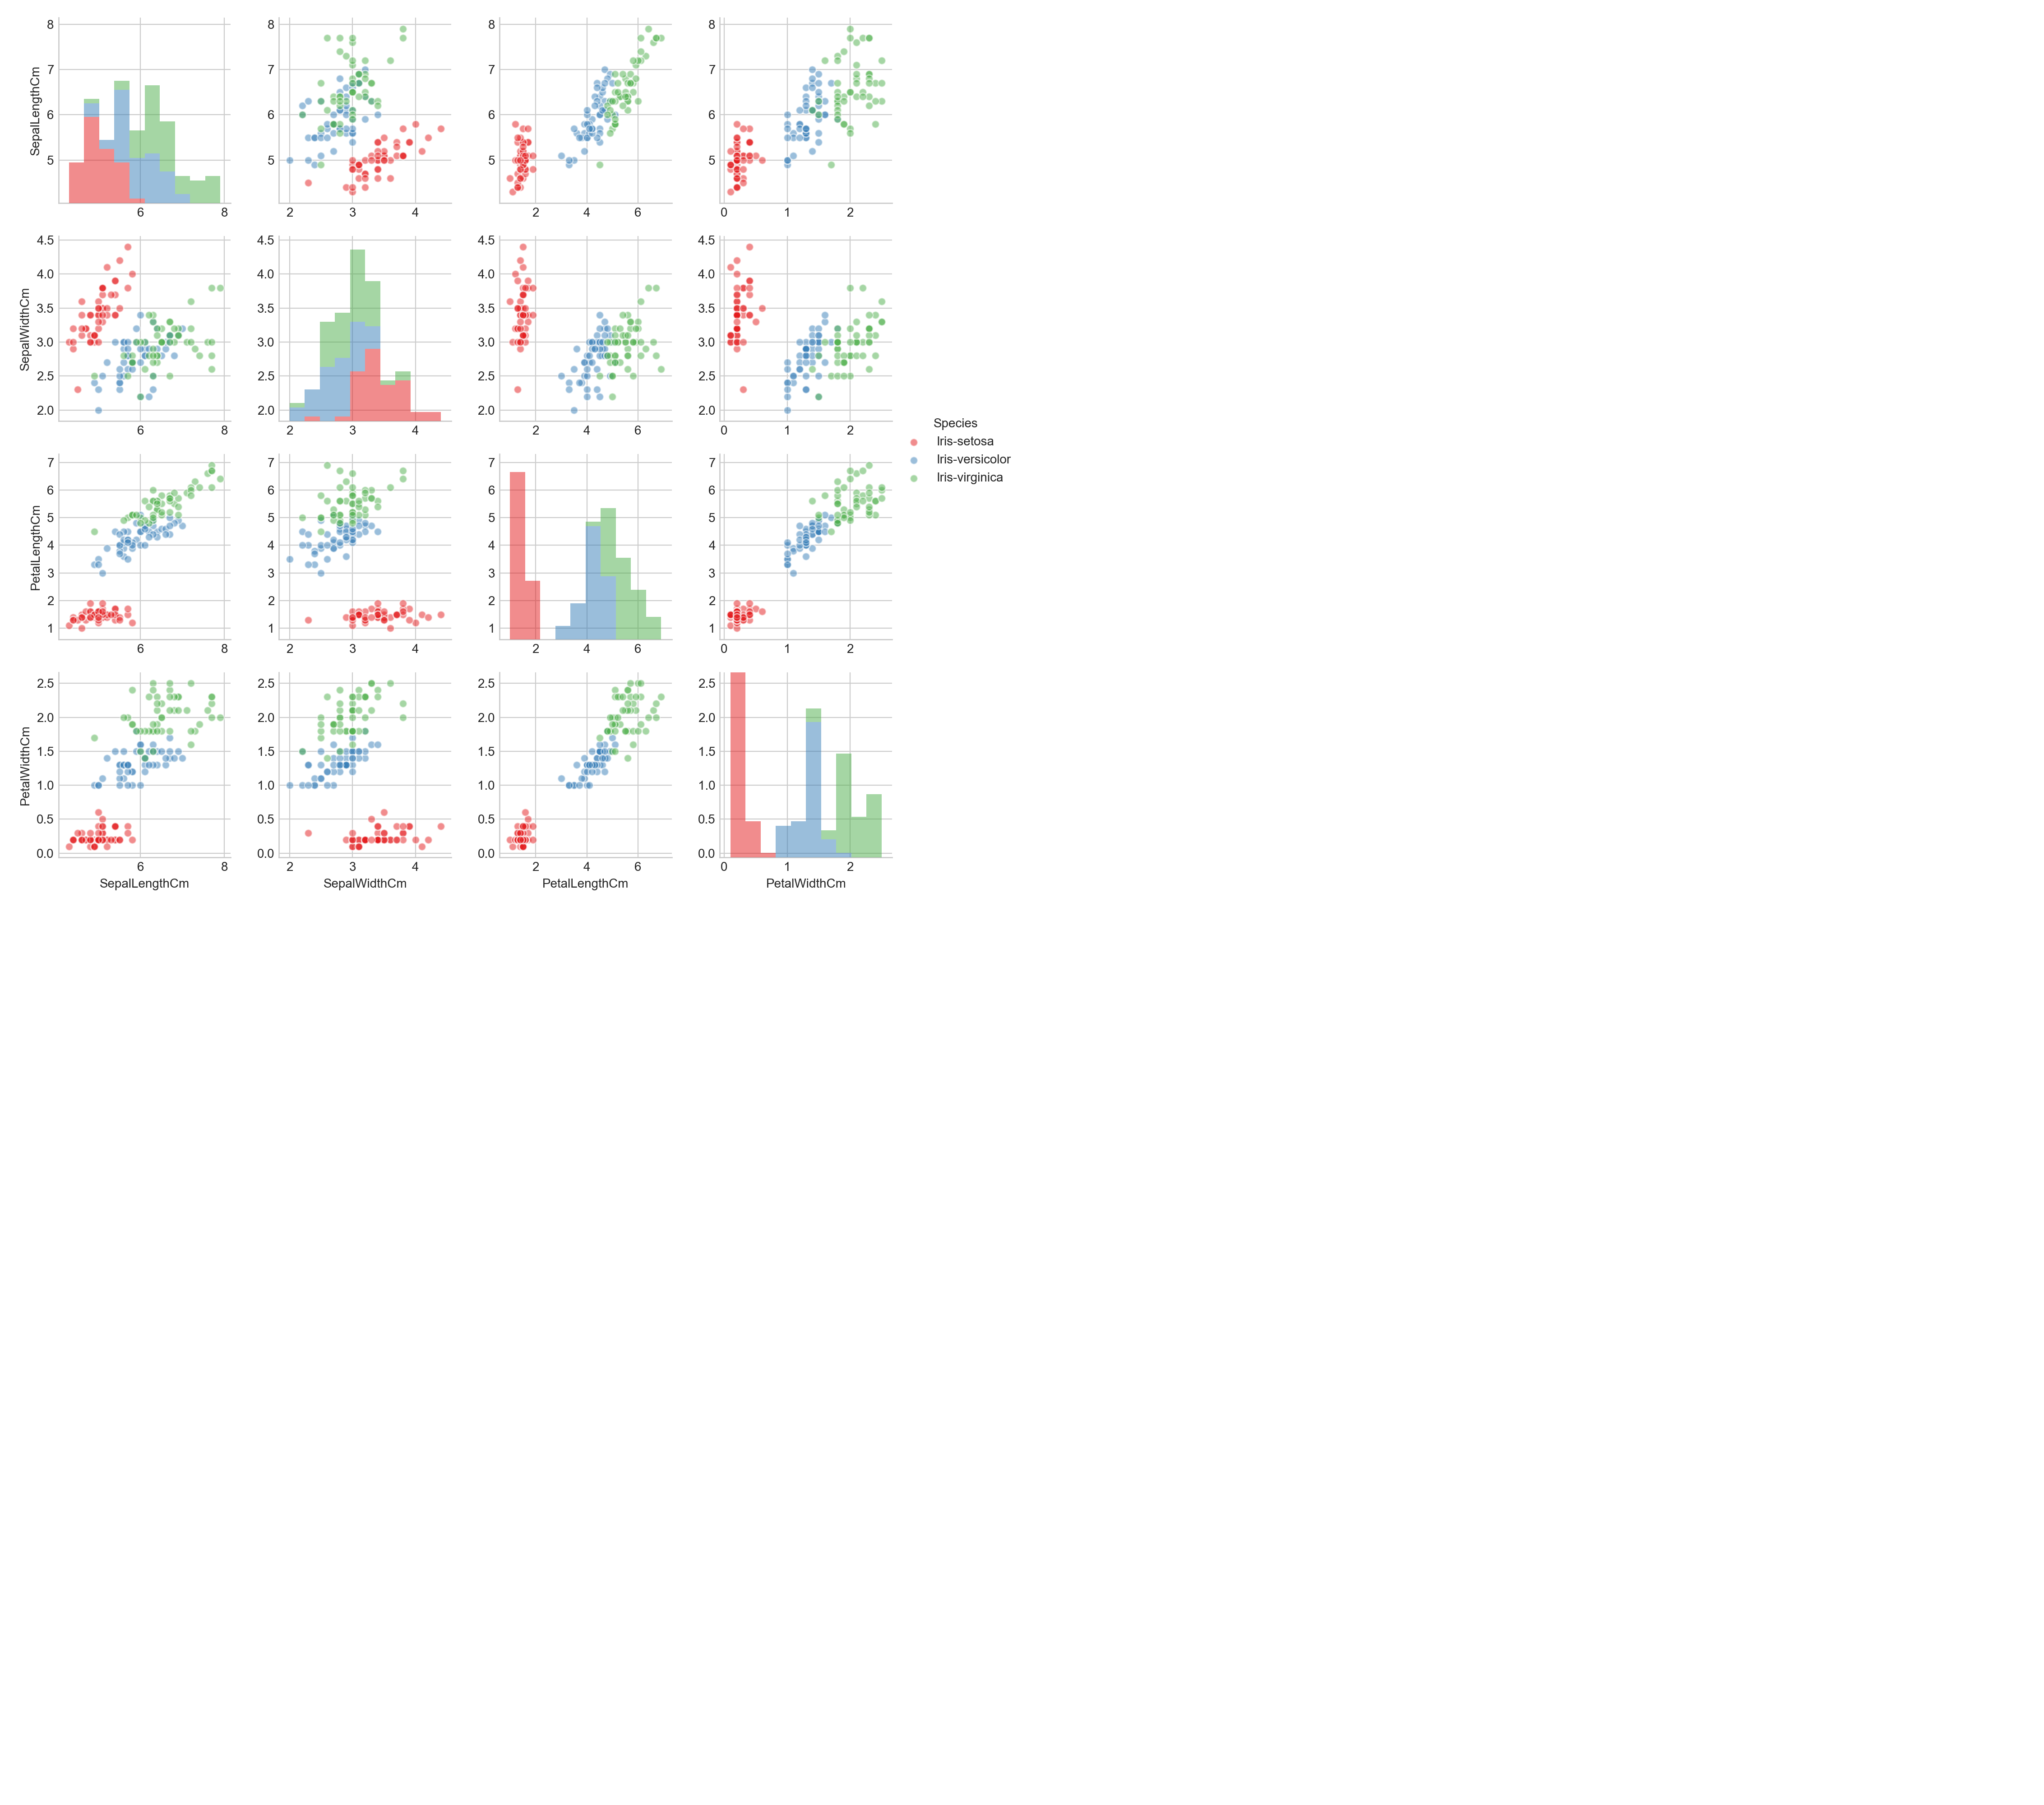

In [20]:
sns.pairplot(data=data, hue='Species', palette='Set1',
             diag_kws={'alpha': 0.5},
             plot_kws={'alpha': 0.5})

In [21]:
X = data.drop(['Species'], axis=1)
y = data['Species']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=1/10,
                                                    stratify=y,
                                                    random_state=1)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                     test_size=1/9,
                                                     stratify=y_train,
                                                     random_state=1)

In [26]:
clf_knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [27]:
y_train_pred = clf_knn.predict(X_train)
y_valid_pred = clf_knn.predict(X_valid)
y_test_pred = clf_knn.predict(X_test)

In [28]:
print('- Accuracy (Train)       : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (Validation)  : {:.4}'.format(accuracy_score(y_valid, y_valid_pred)))
print('- Accuracy (Test)        : {:.4}'.format(accuracy_score(y_test, y_test_pred)))

- Accuracy (Train)       : 0.9667
- Accuracy (Validation)  : 0.9333
- Accuracy (Test)        : 0.9333
